# Customer Segmentation of DataCo Global Supply Chain Dataset - Damks Analytics

#####  Developed By: Oluwasegun M. Adebayo

Customer segmentation is the process of dividing a customer base into groups with similar characteristics, behaviors, or preferences. In Python, you can use various libraries for data manipulation and clustering, such as pandas and scikit-learn.
There are several methods that could be used to develop customer segmentation algorithm and the choice of method is a function of the project's goal. In this case, I'm assuming that DataCo want me to use the variables that are related to sales only because of the upcoming marketing. They want to know the customers to target for some offers to ensure that the marketing returns postive results.

Below, I'll guide you through a customer segmentation project for DataCo Global Supply Chain dataset: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

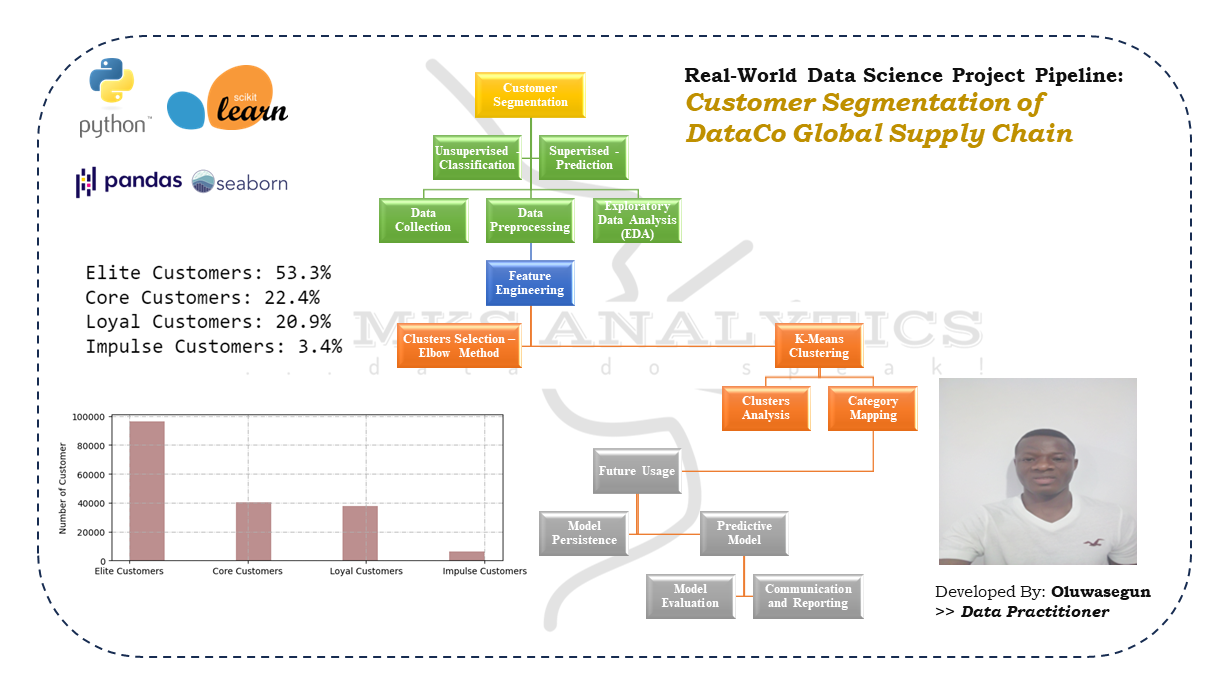

# Step 1: Import Libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Step 2: Load and Explore the Data

In [89]:
# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset_edited.csv',  encoding = 'ISO-8859-1')

In [90]:
# Display the first few rows of the dataset
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer Id,Customer Segment,...,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,20755,Consumer,...,314.640015,91.250000,Southeast Asia,COMPLETE,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,19492,Consumer,...,311.359985,-249.089996,South Asia,PENDING,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,19491,Consumer,...,309.720001,-247.779999,South Asia,CLOSED,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,19490,Home Office,...,304.809998,22.860001,Oceania,COMPLETE,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,19489,Corporate,...,298.250000,134.210007,Oceania,PENDING_PAYMENT,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Customer Id                    180519 non-null  int64  
 9   Customer Segment               180519 non-null  object 
 10  Latitude                       180519 non-null  float64
 11  Longitude                      180519 non-null  float64
 12  Market                        

# Step 3: Data Cleaning and Preprocessing

In [92]:
# Check for missing values
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Customer Id                      0
Customer Segment                 0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region        

In [93]:
# Drop rows with missing values
df = df.dropna()

df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer Id,Customer Segment,...,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,20755,Consumer,...,314.640015,91.250000,Southeast Asia,COMPLETE,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,19492,Consumer,...,311.359985,-249.089996,South Asia,PENDING,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,19491,Consumer,...,309.720001,-247.779999,South Asia,CLOSED,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,19490,Home Office,...,304.809998,22.860001,Oceania,COMPLETE,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,19489,Corporate,...,298.250000,134.210007,Oceania,PENDING_PAYMENT,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Step 4: Feature Engineering

In [94]:
# Select relevant columns for segmentation
selected_cols = ['Order Item Quantity', 'Sales', 'Benefit per order', 
                 'Sales per customer', 'Order Item Discount', 'Order Item Total',
                 'order date (DateOrders)', 'shipping date (DateOrders)']
df_segmentation = df[selected_cols]

In [95]:
df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders)
0,1,327.75,91.250000,314.640015,13.110000,314.640015,1/31/2018 22:56,2/3/2018 22:56
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,1/13/2018 12:27,1/18/2018 12:27
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,1/13/2018 12:06,1/17/2018 12:06
3,1,327.75,22.860001,304.809998,22.940001,304.809998,1/13/2018 11:45,1/16/2018 11:45
4,1,327.75,134.210007,298.250000,29.500000,298.250000,1/13/2018 11:24,1/15/2018 11:24


<Axes: >

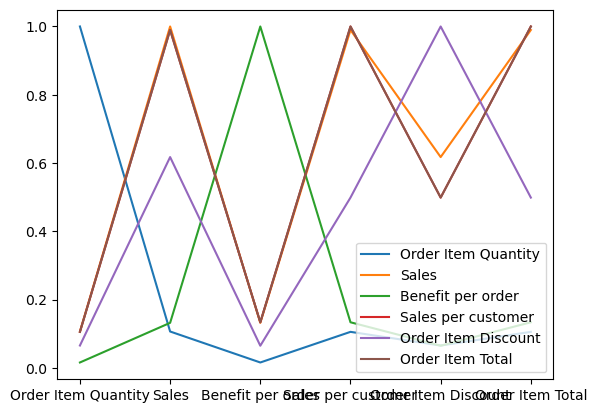

In [96]:
df_segmentation.corr().plot()

In [97]:
# Convert 'OrderDate' and 'ShipDate' to datetime objects
df_segmentation['order date (DateOrders)'] = pd.to_datetime(df_segmentation['order date (DateOrders)'])
df_segmentation['shipping date (DateOrders)'] = pd.to_datetime(df_segmentation['shipping date (DateOrders)'])

In [98]:
# Calculate the duration between order and shipment
df_segmentation['OrderDuration'] = (df_segmentation['shipping date (DateOrders)'] - df_segmentation['order date (DateOrders)']).dt.days

# Display the modified DataFrame
df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders),OrderDuration
0,1,327.75,91.250000,314.640015,13.110000,314.640015,2018-01-31 22:56:00,2018-02-03 22:56:00,3
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,2018-01-13 12:27:00,2018-01-18 12:27:00,5
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,2018-01-13 12:06:00,2018-01-17 12:06:00,4
3,1,327.75,22.860001,304.809998,22.940001,304.809998,2018-01-13 11:45:00,2018-01-16 11:45:00,3
4,1,327.75,134.210007,298.250000,29.500000,298.250000,2018-01-13 11:24:00,2018-01-15 11:24:00,2


### Scaling

In [99]:
# Select numerical columns for scaling
numerical_cols = ['Order Item Quantity', 'Sales', 'Benefit per order', 'Order Item Total',
                  'Sales per customer', 'OrderDuration', 'Order Item Discount']

In [100]:
# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation[numerical_cols])

In [101]:
# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Display the scaled DataFrame
df_scaled.head()

,Order Item Quantity,Sales,Benefit per order,Order Item Total,Sales per customer,OrderDuration,Order Item Discount
0,-0.775836,0.93729,0.663343,1.095708,1.095708,-0.282470,-0.346534
1,-0.775836,0.93729,-2.595582,1.068384,1.068384,0.914801,-0.196082
2,-0.775836,0.93729,-2.583038,1.054722,1.054722,0.316165,-0.120855
3,-0.775836,0.93729,0.008474,1.013820,1.013820,-0.282470,0.104366
4,-0.775836,0.93729,1.074706,0.959174,0.959174,-0.881105,0.405271


### Cluster Selection

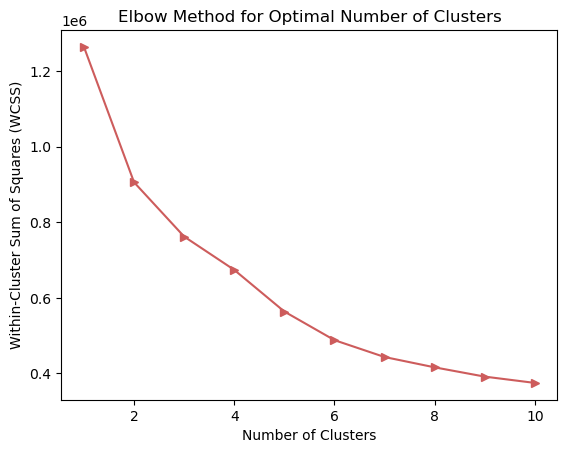

In [102]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='>', color='indianred')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Step 5: Customer Segmentation using K-Means Clustering

In [103]:
# Choose the optimal number of clusters (elbow point)
optimal_clusters = 4

# Customer Segmentation using K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_segmentation['SegmentID'] = kmeans.fit_predict(df_scaled)

# Display the DataFrame with the cluster assignments
df_segmentation.head()

,Order Item Quantity,Sales,Benefit per order,Sales per customer,Order Item Discount,Order Item Total,order date (DateOrders),shipping date (DateOrders),OrderDuration,SegmentID
0,1,327.75,91.250000,314.640015,13.110000,314.640015,2018-01-31 22:56:00,2018-02-03 22:56:00,3,2
1,1,327.75,-249.089996,311.359985,16.389999,311.359985,2018-01-13 12:27:00,2018-01-18 12:27:00,5,3
2,1,327.75,-247.779999,309.720001,18.030001,309.720001,2018-01-13 12:06:00,2018-01-17 12:06:00,4,3
3,1,327.75,22.860001,304.809998,22.940001,304.809998,2018-01-13 11:45:00,2018-01-16 11:45:00,3,2
4,1,327.75,134.210007,298.250000,29.500000,298.250000,2018-01-13 11:24:00,2018-01-15 11:24:00,2,2


#### Customer Category Mapping

In [104]:
# Create 'SegmentCat' column based on 'Cluster' values
df_segmentation['SegmentCat'] = df_segmentation['SegmentID'].map({
    0: 'Elite Customers',
    1: 'Core Customers',
    2: 'Loyal Customers',
    3: 'Impulse Customers'
})

df_segmentation[['SegmentID', 'SegmentCat']].head(10)

,SegmentID,SegmentCat
0,2,Loyal Customers
1,3,Impulse Customers
2,3,Impulse Customers
3,2,Loyal Customers
4,2,Loyal Customers
5,2,Loyal Customers
6,2,Loyal Customers
7,2,Loyal Customers
8,2,Loyal Customers
9,2,Loyal Customers


# Step 6: Analyze the Segmentation

#### Number of customers for each category

In [105]:
elite_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Elite Customers'])/len(df_segmentation))*100
core_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Core Customers'])/len(df_segmentation))*100
loyal_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Loyal Customers'])/len(df_segmentation))*100
impulse_c = (len(df_segmentation[df_segmentation['SegmentCat']=='Impulse Customers'])/len(df_segmentation))*100

print(f'Elite Customers: {elite_c:.1f}%')
print(f'Core Customers: {core_c:.1f}%')
print(f'Loyal Customers: {loyal_c:.1f}%')
print(f'Impulse Customers: {impulse_c:.1f}%')

Elite Customers: 53.3%
Core Customers: 22.4%
Loyal Customers: 20.9%
Impulse Customers: 3.4%


#### Data Visualizations

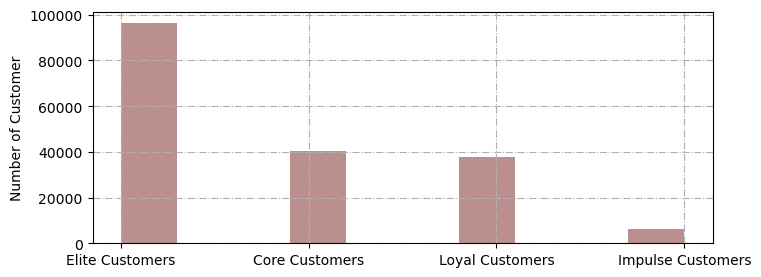

In [106]:
cat = df_segmentation[['SegmentCat', 'SegmentID']]
cat_sorted = cat.sort_values(by=['SegmentID'])
plt.figure(figsize=(8,3))
plt.hist(cat_sorted['SegmentCat'], color='rosybrown')
plt.ylabel('Number of Customer')
plt.grid(True, linestyle='-.')
plt.show()

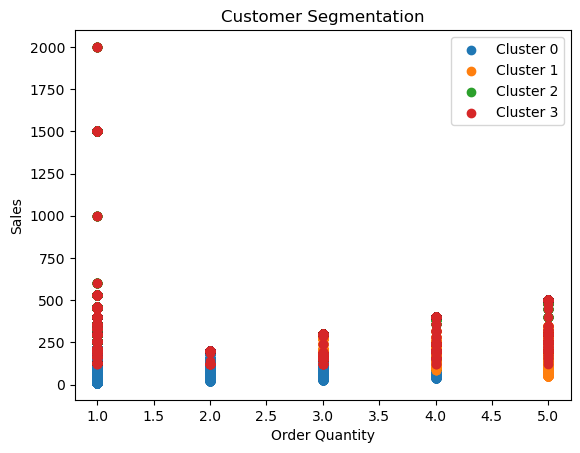

In [107]:
# Visualize the clusters
for cluster in range(optimal_clusters):
    cluster_data = df_segmentation[df_segmentation['SegmentID'] == cluster]
    plt.scatter(cluster_data['Order Item Quantity'], cluster_data['Sales'],
                label=f'Cluster {cluster}')

plt.xlabel('Order Quantity')
plt.ylabel('Sales')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

- Box Plots: These plots show the distribution of each numerical feature within different clusters. They help visualize the spread of data and identify potential outliers.

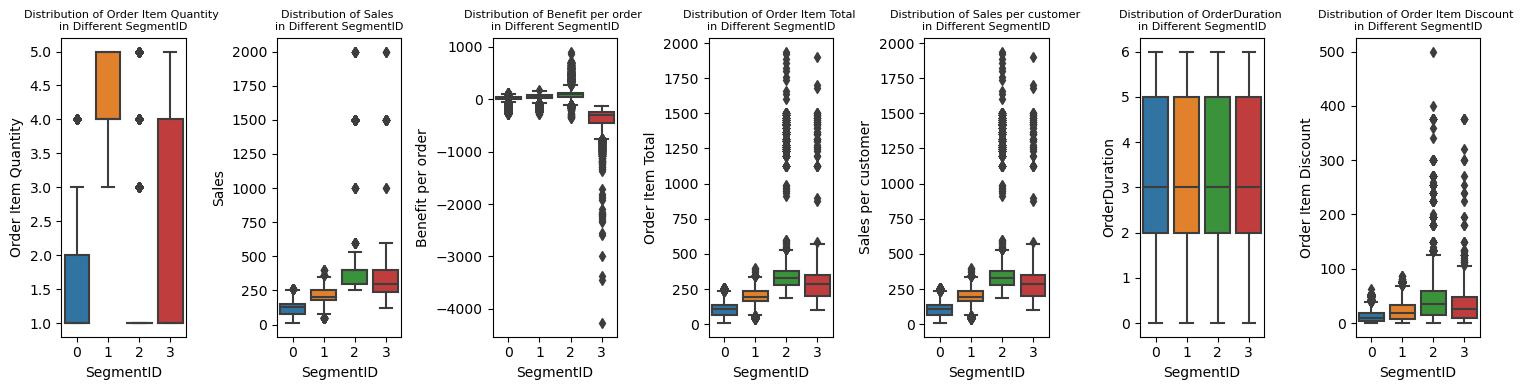

In [108]:
# Visualize the distribution of each feature in different clusters
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 7, i)
    sns.boxplot(x='SegmentID', y=col, data=df_segmentation)
    plt.title(f'Distribution of {col} \nin Different SegmentID', fontsize=8)

plt.tight_layout()
plt.show()

- Cluster Characteristics: Bar plots showing the mean values of features in each cluster. This provides insight into the characteristics that differentiate one cluster from another.

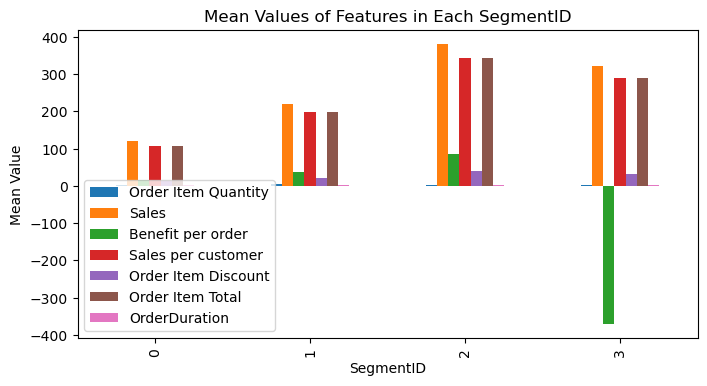

In [111]:
# Explore the characteristics of each cluster
cluster_means = df_segmentation.groupby('SegmentID').mean()
cluster_means.plot(kind='bar', figsize=(8, 4))
plt.title('Mean Values of Features in Each SegmentID')
plt.ylabel('Mean Value')
plt.legend(loc='lower left')
plt.show()

# Step 7: Predictive Modelling

In [112]:
# Save the trained model and scaler for future use
import joblib

joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']

In [113]:
# Predict the category for new data
def predict_category(new_data):
    # Load the trained model and scaler
    kmeans_model = joblib.load('kmeans_model.joblib')
    scaler_model = joblib.load('scaler_model.joblib')

    # Preprocess the new data
    new_data_scaled = scaler_model.transform(new_data)
    
    # Predict the cluster
    cluster_prediction = kmeans_model.predict(new_data_scaled)

    # Map the cluster to the category
    category_prediction = {
        0: 'Elite Customers',
        1: 'Core Customers',
        2: 'Loyal Customers',
        3: 'Impulse Customers'
    }.get(cluster_prediction[0], 'Unknown Category')

    return category_prediction

In [114]:
# Predictions
new_data_example = [[1, 327.75, 91.25, 314.64, 3, 314.64, 13.11]]  # New data for the predictors
predicted_category = predict_category(new_data_example)
print(f"Predicted Category: {predicted_category}")

Predicted Category: Elite Customers


### Exercise:

#### Use the similar approach in this project to perform customer segmentation using other variables such as "Latitude", "Longitude", "Sales", "Quantity" etc based on your choice.

Really, this is how to learn and learn well!

Good luck!

Thank you!

Follow me for more:
#####  LinkedIn: @Oluwasegun M. Adebayo
##### Twitter: @OMA_Adebayo
##### Instagram: @oma_adebayo                                                                                                            